# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
                                    'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
                                    'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75'])

# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,asm_r__MIN,asm_r_MAX,asm_r_MEAN,...,asm_g_Q25,asm_g_Q50,asm_g_Q75,asm_b__MIN,asm_b_MAX,asm_b_MEAN,asm_b_STD,asm_b_Q25,asm_b_Q50,asm_b_Q75
0,6.824,9.240,1912,784,-0.73,2.58,2.33,0.004790,0.020304,0.005212,...,0.004989,0.005070,0.005200,0.004800,0.026332,0.005252,0.000687,0.005010,0.005096,0.005233
1,8.189,9.622,2005,818,0.59,2.92,2.47,0.004805,0.013653,0.005186,...,0.004975,0.005048,0.005161,0.004805,0.012283,0.005200,0.000537,0.005001,0.005077,0.005205
2,8.380,9.589,2001,818,0.78,2.88,2.44,0.004799,0.007455,0.005114,...,0.004980,0.005057,0.005170,0.004817,0.007386,0.005142,0.000213,0.005010,0.005091,0.005207
3,8.137,9.449,2040,833,0.52,2.72,2.55,0.004799,0.015074,0.005196,...,0.004997,0.005089,0.005234,0.004800,0.016520,0.005228,0.000466,0.005024,0.005123,0.005285
4,7.696,9.401,1758,717,0.22,2.83,2.14,0.004798,0.012081,0.005158,...,0.004971,0.005048,0.005173,0.004810,0.012377,0.005190,0.000428,0.005000,0.005085,0.005226


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   asm_r__MIN     103 non-null    float64
 8   asm_r_MAX      103 non-null    float64
 9   asm_r_MEAN     103 non-null    float64
 10  asm_r_STD      103 non-null    float64
 11  asm_r_Q25      103 non-null    float64
 12  asm_r_Q50      103 non-null    float64
 13  asm_r_Q75      103 non-null    float64
 14  asm_g__MIN     103 non-null    float64
 15  asm_g_MAX      103 non-null    float64
 16  asm_g_MEAN     103 non-null    float64
 17  asm_g_STD      103 non-null    float64
 18  asm_g_Q25 

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_20230/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [6]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,asm_r__MIN,asm_r_MAX,asm_r_MEAN,...,asm_g_Q25,asm_g_Q50,asm_g_Q75,asm_b__MIN,asm_b_MAX,asm_b_MEAN,asm_b_STD,asm_b_Q25,asm_b_Q50,asm_b_Q75
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,0.004800,0.028333,0.005299,...,0.004999,0.005095,0.005268,0.004804,0.030546,0.005325,0.000905,0.005021,0.005124,0.005310
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,0.000020,0.033046,0.000224,...,0.000079,0.000115,0.000190,0.000020,0.034685,0.000232,0.000890,0.000086,0.000127,0.000209
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,0.004776,0.005984,0.005036,...,0.004922,0.004982,0.005068,0.004773,0.006100,0.005038,0.000131,0.004932,0.004992,0.005085
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,0.004788,0.009691,0.005128,...,0.004955,0.005030,0.005150,0.004791,0.009921,0.005157,0.000294,0.004970,0.005049,0.005179
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,0.004795,0.015573,0.005230,...,0.004978,0.005065,0.005200,0.004800,0.016141,0.005264,0.000593,0.004998,0.005086,0.005242
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,0.004806,0.031955,0.005377,...,0.005003,0.005108,0.005328,0.004811,0.037456,0.005388,0.001088,0.005032,0.005138,0.005370
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,0.004908,0.213997,0.005949,...,0.005370,0.005605,0.005955,0.004879,0.208783,0.006128,0.005298,0.005426,0.005694,0.006090


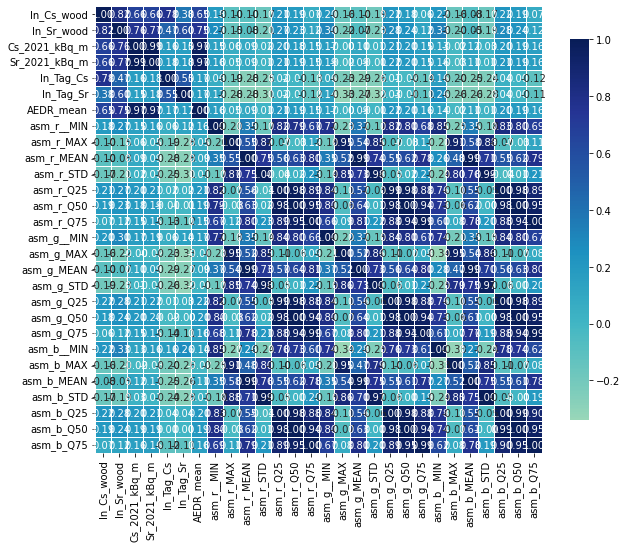

In [7]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [8]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
                                   'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
                                   'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75'])
y = pd.DataFrame(select, columns= ['ln_Tag_Sr'])

In [9]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [10]:
# Columns in "X" data collections
X.head()

,asm_r__MIN,asm_r_MAX,asm_r_MEAN,asm_r_STD,asm_r_Q25,asm_r_Q50,asm_r_Q75,asm_g__MIN,asm_g_MAX,asm_g_MEAN,...,asm_b_MEAN,asm_b_STD,asm_b_Q25,asm_b_Q50,asm_b_Q75,Random1,Random2,Random3,Random4,Random5
0,0.004790,0.020304,0.005212,0.000627,0.004988,0.005071,0.005200,0.004783,0.022367,0.005205,...,0.005252,0.000687,0.005010,0.005096,0.005233,9.945083,9.051682,9.802229,10.311802,11.171529
1,0.004805,0.013653,0.005186,0.000564,0.004986,0.005067,0.005194,0.004789,0.014343,0.005171,...,0.005200,0.000537,0.005001,0.005077,0.005205,10.716412,7.075930,10.276607,10.116269,13.010095
2,0.004799,0.007455,0.005114,0.000189,0.004995,0.005072,0.005183,0.004817,0.007534,0.005105,...,0.005142,0.000213,0.005010,0.005091,0.005207,10.647821,9.835027,11.026660,10.555913,8.911032
3,0.004799,0.015074,0.005196,0.000421,0.005013,0.005106,0.005251,0.004790,0.015006,0.005179,...,0.005228,0.000466,0.005024,0.005123,0.005285,8.257816,8.446601,10.660237,12.980962,8.110613
4,0.004798,0.012081,0.005158,0.000366,0.004985,0.005069,0.005206,0.004783,0.012354,0.005138,...,0.005190,0.000428,0.005000,0.005085,0.005226,5.765506,9.168381,8.966074,7.484366,7.842605


In [11]:
# Columns in "y" data collections
y.head()

,ln_Tag_Sr
0,2.58
1,2.92
2,2.88
3,2.72
4,2.83


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.13690201111916522, 0.04481304645081874, -0.27017609394762565]
    Mean: -0.121
    Std: 0.129

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.93338166 1.07067868 0.94998582]
    Mean: 0.985
    Std: 0.061

 --------------------
Mean absolute error (MAE): 

    Scores: [0.7970935952322824, 0.6795821616228889, 0.5187874490373273]
    Mean: 0.665
    Std: 0.114

 --------------------


# Find optimal hyperparameters for XGBoost model

In [16]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [17]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=30, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model with rank: 1
Mean validation score: 0.104 (std: 0.171)
Parameters: {'colsample_bytree': 0.6255464104360775, 'gamma': 0.36405247868376245, 'learning_rate': 0.0702449099221303, 'max_depth': 2, 'n_estimators': 54, 'subsample': 0.6056010008214542}



In [18]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.19254293, 0.49939637, 0.52254744, 0.3286675 , 0.33040967,
       0.37671456, 0.27678189, 0.4983808 , 0.52436328, 0.1702415 ,
       0.49682207, 0.18379097, 0.50014653, 0.45892768, 0.22602253,
       0.16938906, 0.16471148, 0.31238127, 0.16436353, 0.26616926,
       0.48944483, 0.27514515, 0.19944391, 0.50690131, 0.35577002,
       0.15214081, 0.54179683, 0.24331088, 0.1568974 , 0.51730428]), 'std_fit_time': array([0.05657751, 0.13938553, 0.01433336, 0.02169357, 0.04183341,
       0.01574136, 0.00772408, 0.03269383, 0.0115086 , 0.00571035,
       0.02604184, 0.00525346, 0.03729276, 0.0126872 , 0.00685208,
       0.00428976, 0.00668362, 0.01318833, 0.01251375, 0.01084482,
       0.00955796, 0.00373153, 0.00376042, 0.01455041, 0.03331322,
       0.00377893, 0.1031204 , 0.00813167, 0.00828045, 0.01301271]), 'mean_score_time': array([0.00657635, 0.00657334, 0.00635152, 0.00628891, 0.00644975,
       0.00630803, 0.0062706 , 0.0063406 , 0.00630717, 0.00619187,
     

In [19]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6255464104360775
Gamma: 0.36405247868376245
Learning_rate: 0.0702449099221303
Max_depth: 2
N_estimators: 54
Subsample: 0.6056010008214542


# Estimation of a basic XGBoost model using Loops

In [20]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [21]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:2.08372	validation_1-rmse:1.85126
[1]	validation_0-rmse:1.96076	validation_1-rmse:1.73406
[2]	validation_0-rmse:1.84479	validation_1-rmse:1.62269


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.74187	validation_1-rmse:1.52452
[4]	validation_0-rmse:1.65070	validation_1-rmse:1.44599
[5]	validation_0-rmse:1.55563	validation_1-rmse:1.35526
[6]	validation_0-rmse:1.47709	validation_1-rmse:1.28096
[7]	validation_0-rmse:1.40756	validation_1-rmse:1.22412
[8]	validation_0-rmse:1.33735	validation_1-rmse:1.15751
[9]	validation_0-rmse:1.28318	validation_1-rmse:1.09706
[10]	validation_0-rmse:1.22340	validation_1-rmse:1.05624
[11]	validation_0-rmse:1.16852	validation_1-rmse:1.00334
[12]	validation_0-rmse:1.12425	validation_1-rmse:0.97490
[13]	validation_0-rmse:1.08012	validation_1-rmse:0.93654
[14]	validation_0-rmse:1.04482	validation_1-rmse:0.90277
[15]	validation_0-rmse:1.00930	validation_1-rmse:0.87277
[16]	validation_0-rmse:0.96869	validation_1-rmse:0.83371
[17]	validation_0-rmse:0.93835	validation_1-rmse:0.79849
[18]	validation_0-rmse:0.90678	validation_1-rmse:0.78776
[19]	validation_0-rmse:0.87825	validation_1-rmse:0.76750
[20]	validation_0-rmse:0.85036	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.70860	validation_1-rmse:1.67626
[4]	validation_0-rmse:1.62254	validation_1-rmse:1.58721
[5]	validation_0-rmse:1.53279	validation_1-rmse:1.49645
[6]	validation_0-rmse:1.45130	validation_1-rmse:1.41369
[7]	validation_0-rmse:1.38145	validation_1-rmse:1.34489
[8]	validation_0-rmse:1.30815	validation_1-rmse:1.27024
[9]	validation_0-rmse:1.25121	validation_1-rmse:1.21726
[10]	validation_0-rmse:1.19255	validation_1-rmse:1.15783
[11]	validation_0-rmse:1.13697	validation_1-rmse:1.11757
[12]	validation_0-rmse:1.09129	validation_1-rmse:1.07514
[13]	validation_0-rmse:1.04742	validation_1-rmse:1.03837
[14]	validation_0-rmse:1.00934	validation_1-rmse:1.00708
[15]	validation_0-rmse:0.96467	validation_1-rmse:0.97213
[16]	validation_0-rmse:0.92545	validation_1-rmse:0.94154
[17]	validation_0-rmse:0.88822	validation_1-rmse:0.91771
[18]	validation_0-rmse:0.85684	validation_1-rmse:0.89476
[19]	validation_0-rmse:0.83224	validation_1-rmse:0.87597
[20]	validation_0-rmse:0.80935	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.86726	validation_1-rmse:0.89147
[19]	validation_0-rmse:0.83393	validation_1-rmse:0.88255
[20]	validation_0-rmse:0.81094	validation_1-rmse:0.87091
[21]	validation_0-rmse:0.78319	validation_1-rmse:0.85856
[22]	validation_0-rmse:0.75929	validation_1-rmse:0.84731
[23]	validation_0-rmse:0.73941	validation_1-rmse:0.83790
[24]	validation_0-rmse:0.71998	validation_1-rmse:0.83032
[25]	validation_0-rmse:0.70194	validation_1-rmse:0.82251
[26]	validation_0-rmse:0.68437	validation_1-rmse:0.82334
[27]	validation_0-rmse:0.67428	validation_1-rmse:0.82315
[28]	validation_0-rmse:0.66160	validation_1-rmse:0.82099
[29]	validation_0-rmse:0.65256	validation_1-rmse:0.81586
[30]	validation_0-rmse:0.63589	validation_1-rmse:0.81714
[31]	validation_0-rmse:0.62281	validation_1-rmse:0.81639
[32]	validation_0-rmse:0.60800	validation_1-rmse:0.81402
[33]	validation_0-rmse:0.59809	validation_1-rmse:0.81157
[34]	validation_0-rmse:0.58830	validation_1-rmse:0.80721
[35]	validation_0-rmse:0.58098	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.83419	validation_1-rmse:0.91648
[20]	validation_0-rmse:0.80795	validation_1-rmse:0.90032
[21]	validation_0-rmse:0.78245	validation_1-rmse:0.88196
[22]	validation_0-rmse:0.76500	validation_1-rmse:0.86774
[23]	validation_0-rmse:0.74459	validation_1-rmse:0.85436
[24]	validation_0-rmse:0.73208	validation_1-rmse:0.84802
[25]	validation_0-rmse:0.72076	validation_1-rmse:0.84142
[26]	validation_0-rmse:0.70452	validation_1-rmse:0.83617
[27]	validation_0-rmse:0.68785	validation_1-rmse:0.83408
[28]	validation_0-rmse:0.67452	validation_1-rmse:0.82726
[29]	validation_0-rmse:0.66560	validation_1-rmse:0.82443
[30]	validation_0-rmse:0.65695	validation_1-rmse:0.81807
[31]	validation_0-rmse:0.64504	validation_1-rmse:0.80977
[32]	validation_0-rmse:0.63652	validation_1-rmse:0.80727
[33]	validation_0-rmse:0.62888	validation_1-rmse:0.80473
[34]	validation_0-rmse:0.61940	validation_1-rmse:0.80124
[35]	validation_0-rmse:0.60991	validation_1-rmse:0.80151
[36]	validation_0-rmse:0.60046	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:1.03062	validation_1-rmse:1.13835
[15]	validation_0-rmse:0.98747	validation_1-rmse:1.09983
[16]	validation_0-rmse:0.94701	validation_1-rmse:1.07112
[17]	validation_0-rmse:0.91492	validation_1-rmse:1.05217
[18]	validation_0-rmse:0.88492	validation_1-rmse:1.03567
[19]	validation_0-rmse:0.85764	validation_1-rmse:1.01981
[20]	validation_0-rmse:0.83488	validation_1-rmse:1.00630
[21]	validation_0-rmse:0.80969	validation_1-rmse:0.98211
[22]	validation_0-rmse:0.78514	validation_1-rmse:0.96195
[23]	validation_0-rmse:0.76700	validation_1-rmse:0.94541
[24]	validation_0-rmse:0.75153	validation_1-rmse:0.93331
[25]	validation_0-rmse:0.73241	validation_1-rmse:0.92221
[26]	validation_0-rmse:0.71473	validation_1-rmse:0.90914
[27]	validation_0-rmse:0.69884	validation_1-rmse:0.89297
[28]	validation_0-rmse:0.68481	validation_1-rmse:0.88063
[29]	validation_0-rmse:0.67174	validation_1-rmse:0.86978
[30]	validation_0-rmse:0.65956	validation_1-rmse:0.85784
[31]	validation_0-rmse:0.65074	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:1.13143	validation_1-rmse:1.05735
[12]	validation_0-rmse:1.08990	validation_1-rmse:1.01193
[13]	validation_0-rmse:1.05224	validation_1-rmse:0.98232
[14]	validation_0-rmse:1.01450	validation_1-rmse:0.94064
[15]	validation_0-rmse:0.97695	validation_1-rmse:0.89908
[16]	validation_0-rmse:0.94945	validation_1-rmse:0.87102
[17]	validation_0-rmse:0.91545	validation_1-rmse:0.83118
[18]	validation_0-rmse:0.88813	validation_1-rmse:0.79928
[19]	validation_0-rmse:0.85569	validation_1-rmse:0.77017
[20]	validation_0-rmse:0.82962	validation_1-rmse:0.74974
[21]	validation_0-rmse:0.80700	validation_1-rmse:0.72267
[22]	validation_0-rmse:0.79000	validation_1-rmse:0.70843
[23]	validation_0-rmse:0.76840	validation_1-rmse:0.68829
[24]	validation_0-rmse:0.74955	validation_1-rmse:0.67421
[25]	validation_0-rmse:0.73173	validation_1-rmse:0.66418
[26]	validation_0-rmse:0.71887	validation_1-rmse:0.65561
[27]	validation_0-rmse:0.70697	validation_1-rmse:0.65245
[28]	validation_0-rmse:0.69362	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.93461	validation_1-rmse:0.96286
[17]	validation_0-rmse:0.90256	validation_1-rmse:0.94003
[18]	validation_0-rmse:0.87494	validation_1-rmse:0.91061
[19]	validation_0-rmse:0.84801	validation_1-rmse:0.89125
[20]	validation_0-rmse:0.82131	validation_1-rmse:0.86733
[21]	validation_0-rmse:0.79823	validation_1-rmse:0.84942
[22]	validation_0-rmse:0.77940	validation_1-rmse:0.84212
[23]	validation_0-rmse:0.75534	validation_1-rmse:0.83392
[24]	validation_0-rmse:0.73213	validation_1-rmse:0.80481
[25]	validation_0-rmse:0.71568	validation_1-rmse:0.79691
[26]	validation_0-rmse:0.69710	validation_1-rmse:0.78182
[27]	validation_0-rmse:0.68368	validation_1-rmse:0.77666
[28]	validation_0-rmse:0.67247	validation_1-rmse:0.76639
[29]	validation_0-rmse:0.66066	validation_1-rmse:0.75244
[30]	validation_0-rmse:0.65240	validation_1-rmse:0.75335
[31]	validation_0-rmse:0.63970	validation_1-rmse:0.75013
[32]	validation_0-rmse:0.63067	validation_1-rmse:0.74385
[33]	validation_0-rmse:0.62093	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.83518	validation_1-rmse:0.77860
[21]	validation_0-rmse:0.81018	validation_1-rmse:0.74926
[22]	validation_0-rmse:0.78982	validation_1-rmse:0.73105
[23]	validation_0-rmse:0.77116	validation_1-rmse:0.71951
[24]	validation_0-rmse:0.75494	validation_1-rmse:0.70903
[25]	validation_0-rmse:0.73599	validation_1-rmse:0.68548
[26]	validation_0-rmse:0.72208	validation_1-rmse:0.68364
[27]	validation_0-rmse:0.70617	validation_1-rmse:0.67430
[28]	validation_0-rmse:0.69322	validation_1-rmse:0.66713
[29]	validation_0-rmse:0.68283	validation_1-rmse:0.66133
[30]	validation_0-rmse:0.67251	validation_1-rmse:0.65797
[31]	validation_0-rmse:0.66025	validation_1-rmse:0.65755
[32]	validation_0-rmse:0.64901	validation_1-rmse:0.65254
[33]	validation_0-rmse:0.63932	validation_1-rmse:0.64696
[34]	validation_0-rmse:0.63166	validation_1-rmse:0.64570
[35]	validation_0-rmse:0.62278	validation_1-rmse:0.64179
[36]	validation_0-rmse:0.61713	validation_1-rmse:0.63661
[37]	validation_0-rmse:0.60753	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.82204	validation_1-rmse:1.11737
[20]	validation_0-rmse:0.79875	validation_1-rmse:1.09166
[21]	validation_0-rmse:0.77428	validation_1-rmse:1.06124
[22]	validation_0-rmse:0.75275	validation_1-rmse:1.04506
[23]	validation_0-rmse:0.73647	validation_1-rmse:1.02372
[24]	validation_0-rmse:0.71785	validation_1-rmse:1.01952
[25]	validation_0-rmse:0.70479	validation_1-rmse:0.99910
[26]	validation_0-rmse:0.68988	validation_1-rmse:0.99585
[27]	validation_0-rmse:0.67525	validation_1-rmse:0.98803
[28]	validation_0-rmse:0.66293	validation_1-rmse:0.98118
[29]	validation_0-rmse:0.64831	validation_1-rmse:0.96423
[30]	validation_0-rmse:0.63569	validation_1-rmse:0.94973
[31]	validation_0-rmse:0.62603	validation_1-rmse:0.94123
[32]	validation_0-rmse:0.61476	validation_1-rmse:0.93578
[33]	validation_0-rmse:0.60053	validation_1-rmse:0.92861
[34]	validation_0-rmse:0.59261	validation_1-rmse:0.92723
[35]	validation_0-rmse:0.58293	validation_1-rmse:0.92206
[36]	validation_0-rmse:0.57446	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.79067	validation_1-rmse:0.93955
[21]	validation_0-rmse:0.76550	validation_1-rmse:0.91744
[22]	validation_0-rmse:0.74389	validation_1-rmse:0.90313
[23]	validation_0-rmse:0.72353	validation_1-rmse:0.89147
[24]	validation_0-rmse:0.70712	validation_1-rmse:0.88549
[25]	validation_0-rmse:0.68655	validation_1-rmse:0.87073
[26]	validation_0-rmse:0.67103	validation_1-rmse:0.86315
[27]	validation_0-rmse:0.65330	validation_1-rmse:0.85444
[28]	validation_0-rmse:0.63977	validation_1-rmse:0.84756
[29]	validation_0-rmse:0.62238	validation_1-rmse:0.84580
[30]	validation_0-rmse:0.60713	validation_1-rmse:0.84346
[31]	validation_0-rmse:0.59582	validation_1-rmse:0.83969
[32]	validation_0-rmse:0.58615	validation_1-rmse:0.83778
[33]	validation_0-rmse:0.57775	validation_1-rmse:0.82840
[34]	validation_0-rmse:0.57040	validation_1-rmse:0.82347
[35]	validation_0-rmse:0.56000	validation_1-rmse:0.82172
[36]	validation_0-rmse:0.55341	validation_1-rmse:0.82140
[37]	validation_0-rmse:0.54504	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.88165	validation_1-rmse:1.03034
[19]	validation_0-rmse:0.85860	validation_1-rmse:1.00761
[20]	validation_0-rmse:0.83737	validation_1-rmse:0.98978
[21]	validation_0-rmse:0.81243	validation_1-rmse:0.96881
[22]	validation_0-rmse:0.79159	validation_1-rmse:0.95389
[23]	validation_0-rmse:0.77438	validation_1-rmse:0.93702
[24]	validation_0-rmse:0.75470	validation_1-rmse:0.91529
[25]	validation_0-rmse:0.73581	validation_1-rmse:0.89373
[26]	validation_0-rmse:0.72632	validation_1-rmse:0.89262
[27]	validation_0-rmse:0.71286	validation_1-rmse:0.87717
[28]	validation_0-rmse:0.70035	validation_1-rmse:0.86780
[29]	validation_0-rmse:0.68767	validation_1-rmse:0.85248
[30]	validation_0-rmse:0.67509	validation_1-rmse:0.83149
[31]	validation_0-rmse:0.66495	validation_1-rmse:0.82623
[32]	validation_0-rmse:0.65645	validation_1-rmse:0.81398
[33]	validation_0-rmse:0.64575	validation_1-rmse:0.80664
[34]	validation_0-rmse:0.63495	validation_1-rmse:0.79446
[35]	validation_0-rmse:0.62408	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.79999	validation_1-rmse:1.07253
[20]	validation_0-rmse:0.76908	validation_1-rmse:1.05472
[21]	validation_0-rmse:0.74216	validation_1-rmse:1.03888
[22]	validation_0-rmse:0.72146	validation_1-rmse:1.02713
[23]	validation_0-rmse:0.69967	validation_1-rmse:1.01200
[24]	validation_0-rmse:0.68266	validation_1-rmse:1.00142
[25]	validation_0-rmse:0.66369	validation_1-rmse:0.98339
[26]	validation_0-rmse:0.65247	validation_1-rmse:0.97638
[27]	validation_0-rmse:0.64171	validation_1-rmse:0.96221
[28]	validation_0-rmse:0.62591	validation_1-rmse:0.96867
[29]	validation_0-rmse:0.61268	validation_1-rmse:0.96373
[30]	validation_0-rmse:0.60418	validation_1-rmse:0.95228
[31]	validation_0-rmse:0.59412	validation_1-rmse:0.94841
[32]	validation_0-rmse:0.58544	validation_1-rmse:0.94529
[33]	validation_0-rmse:0.57665	validation_1-rmse:0.93638
[34]	validation_0-rmse:0.56972	validation_1-rmse:0.93517
[35]	validation_0-rmse:0.56061	validation_1-rmse:0.93571
[36]	validation_0-rmse:0.55189	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.87914	validation_1-rmse:1.09681
[18]	validation_0-rmse:0.84483	validation_1-rmse:1.06095
[19]	validation_0-rmse:0.81707	validation_1-rmse:1.03427
[20]	validation_0-rmse:0.79434	validation_1-rmse:1.01088
[21]	validation_0-rmse:0.76785	validation_1-rmse:0.98191
[22]	validation_0-rmse:0.74553	validation_1-rmse:0.96672
[23]	validation_0-rmse:0.72886	validation_1-rmse:0.95591
[24]	validation_0-rmse:0.71179	validation_1-rmse:0.93859
[25]	validation_0-rmse:0.69738	validation_1-rmse:0.93142
[26]	validation_0-rmse:0.68382	validation_1-rmse:0.92683
[27]	validation_0-rmse:0.66948	validation_1-rmse:0.91432
[28]	validation_0-rmse:0.65836	validation_1-rmse:0.90793
[29]	validation_0-rmse:0.64891	validation_1-rmse:0.90588
[30]	validation_0-rmse:0.63823	validation_1-rmse:0.89860
[31]	validation_0-rmse:0.62473	validation_1-rmse:0.89346
[32]	validation_0-rmse:0.61393	validation_1-rmse:0.88726
[33]	validation_0-rmse:0.60046	validation_1-rmse:0.88050
[34]	validation_0-rmse:0.59433	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.77717	validation_1-rmse:0.88167
[22]	validation_0-rmse:0.75675	validation_1-rmse:0.87356
[23]	validation_0-rmse:0.74089	validation_1-rmse:0.88124
[24]	validation_0-rmse:0.72158	validation_1-rmse:0.87203
[25]	validation_0-rmse:0.70639	validation_1-rmse:0.86182
[26]	validation_0-rmse:0.68979	validation_1-rmse:0.85195
[27]	validation_0-rmse:0.67308	validation_1-rmse:0.86216
[28]	validation_0-rmse:0.65897	validation_1-rmse:0.86020
[29]	validation_0-rmse:0.64846	validation_1-rmse:0.85064
[30]	validation_0-rmse:0.63728	validation_1-rmse:0.84723
[31]	validation_0-rmse:0.62556	validation_1-rmse:0.84429
[32]	validation_0-rmse:0.61637	validation_1-rmse:0.84250
[33]	validation_0-rmse:0.60861	validation_1-rmse:0.84907
[34]	validation_0-rmse:0.59867	validation_1-rmse:0.85252
[35]	validation_0-rmse:0.59204	validation_1-rmse:0.84576
[36]	validation_0-rmse:0.58399	validation_1-rmse:0.85008
[37]	validation_0-rmse:0.57526	validation_1-rmse:0.86024
[38]	validation_0-rmse:0.56789	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.80615	validation_1-rmse:0.90033
[21]	validation_0-rmse:0.78111	validation_1-rmse:0.87591
[22]	validation_0-rmse:0.76305	validation_1-rmse:0.86726
[23]	validation_0-rmse:0.74308	validation_1-rmse:0.85850
[24]	validation_0-rmse:0.72479	validation_1-rmse:0.84201
[25]	validation_0-rmse:0.70183	validation_1-rmse:0.82580
[26]	validation_0-rmse:0.68321	validation_1-rmse:0.80536
[27]	validation_0-rmse:0.66914	validation_1-rmse:0.79037
[28]	validation_0-rmse:0.65768	validation_1-rmse:0.77999
[29]	validation_0-rmse:0.64359	validation_1-rmse:0.76960
[30]	validation_0-rmse:0.63197	validation_1-rmse:0.76801
[31]	validation_0-rmse:0.62384	validation_1-rmse:0.76408
[32]	validation_0-rmse:0.61240	validation_1-rmse:0.75936
[33]	validation_0-rmse:0.60576	validation_1-rmse:0.75884
[34]	validation_0-rmse:0.59836	validation_1-rmse:0.75502
[35]	validation_0-rmse:0.59149	validation_1-rmse:0.74383
[36]	validation_0-rmse:0.58399	validation_1-rmse:0.74482
[37]	validation_0-rmse:0.57769	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.93824	validation_1-rmse:1.12070
[16]	validation_0-rmse:0.89710	validation_1-rmse:1.10037
[17]	validation_0-rmse:0.86834	validation_1-rmse:1.08105
[18]	validation_0-rmse:0.83638	validation_1-rmse:1.06923
[19]	validation_0-rmse:0.81366	validation_1-rmse:1.05027
[20]	validation_0-rmse:0.78736	validation_1-rmse:1.03266
[21]	validation_0-rmse:0.76155	validation_1-rmse:1.02043
[22]	validation_0-rmse:0.73253	validation_1-rmse:1.01072
[23]	validation_0-rmse:0.71320	validation_1-rmse:0.99447
[24]	validation_0-rmse:0.69203	validation_1-rmse:0.98708
[25]	validation_0-rmse:0.67319	validation_1-rmse:0.98897
[26]	validation_0-rmse:0.65342	validation_1-rmse:0.98425
[27]	validation_0-rmse:0.63885	validation_1-rmse:0.98170
[28]	validation_0-rmse:0.62193	validation_1-rmse:0.97713
[29]	validation_0-rmse:0.60982	validation_1-rmse:0.97260
[30]	validation_0-rmse:0.59722	validation_1-rmse:0.97057
[31]	validation_0-rmse:0.58530	validation_1-rmse:0.96559
[32]	validation_0-rmse:0.57650	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.87429	validation_1-rmse:0.95738
[19]	validation_0-rmse:0.84508	validation_1-rmse:0.93202
[20]	validation_0-rmse:0.81934	validation_1-rmse:0.91379
[21]	validation_0-rmse:0.79286	validation_1-rmse:0.88971
[22]	validation_0-rmse:0.76919	validation_1-rmse:0.86968
[23]	validation_0-rmse:0.74910	validation_1-rmse:0.84962
[24]	validation_0-rmse:0.73212	validation_1-rmse:0.83258
[25]	validation_0-rmse:0.71535	validation_1-rmse:0.82590
[26]	validation_0-rmse:0.69957	validation_1-rmse:0.81613
[27]	validation_0-rmse:0.68565	validation_1-rmse:0.80446
[28]	validation_0-rmse:0.67033	validation_1-rmse:0.79758
[29]	validation_0-rmse:0.66065	validation_1-rmse:0.79144
[30]	validation_0-rmse:0.65059	validation_1-rmse:0.78244
[31]	validation_0-rmse:0.64080	validation_1-rmse:0.77466
[32]	validation_0-rmse:0.63120	validation_1-rmse:0.76460
[33]	validation_0-rmse:0.62111	validation_1-rmse:0.75775
[34]	validation_0-rmse:0.61018	validation_1-rmse:0.75416
[35]	validation_0-rmse:0.60237	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.81069	validation_1-rmse:0.99177
[20]	validation_0-rmse:0.78436	validation_1-rmse:0.97293
[21]	validation_0-rmse:0.76004	validation_1-rmse:0.95863
[22]	validation_0-rmse:0.73767	validation_1-rmse:0.94513
[23]	validation_0-rmse:0.72032	validation_1-rmse:0.92781
[24]	validation_0-rmse:0.70339	validation_1-rmse:0.91593
[25]	validation_0-rmse:0.68484	validation_1-rmse:0.90284
[26]	validation_0-rmse:0.66883	validation_1-rmse:0.88926
[27]	validation_0-rmse:0.65485	validation_1-rmse:0.87473
[28]	validation_0-rmse:0.64492	validation_1-rmse:0.86329
[29]	validation_0-rmse:0.62908	validation_1-rmse:0.85827
[30]	validation_0-rmse:0.61549	validation_1-rmse:0.84929
[31]	validation_0-rmse:0.60545	validation_1-rmse:0.84098
[32]	validation_0-rmse:0.59616	validation_1-rmse:0.83154
[33]	validation_0-rmse:0.58421	validation_1-rmse:0.83062
[34]	validation_0-rmse:0.57645	validation_1-rmse:0.82546
[35]	validation_0-rmse:0.56750	validation_1-rmse:0.81881
[36]	validation_0-rmse:0.56156	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.88374	validation_1-rmse:0.79410
[19]	validation_0-rmse:0.85822	validation_1-rmse:0.77501
[20]	validation_0-rmse:0.83830	validation_1-rmse:0.77298
[21]	validation_0-rmse:0.81396	validation_1-rmse:0.74939
[22]	validation_0-rmse:0.78932	validation_1-rmse:0.72884
[23]	validation_0-rmse:0.76403	validation_1-rmse:0.71522
[24]	validation_0-rmse:0.74135	validation_1-rmse:0.69615
[25]	validation_0-rmse:0.72831	validation_1-rmse:0.68183
[26]	validation_0-rmse:0.71177	validation_1-rmse:0.66863
[27]	validation_0-rmse:0.69948	validation_1-rmse:0.66604
[28]	validation_0-rmse:0.68386	validation_1-rmse:0.65667
[29]	validation_0-rmse:0.67136	validation_1-rmse:0.65317
[30]	validation_0-rmse:0.65844	validation_1-rmse:0.64968
[31]	validation_0-rmse:0.64672	validation_1-rmse:0.64222
[32]	validation_0-rmse:0.63761	validation_1-rmse:0.63709
[33]	validation_0-rmse:0.62653	validation_1-rmse:0.62377
[34]	validation_0-rmse:0.61877	validation_1-rmse:0.62135
[35]	validation_0-rmse:0.61130	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.84002	validation_1-rmse:1.14049
[19]	validation_0-rmse:0.81187	validation_1-rmse:1.12317
[20]	validation_0-rmse:0.78834	validation_1-rmse:1.10304
[21]	validation_0-rmse:0.76812	validation_1-rmse:1.08871
[22]	validation_0-rmse:0.74417	validation_1-rmse:1.07468
[23]	validation_0-rmse:0.72352	validation_1-rmse:1.06423
[24]	validation_0-rmse:0.70465	validation_1-rmse:1.04641
[25]	validation_0-rmse:0.69281	validation_1-rmse:1.03442
[26]	validation_0-rmse:0.67505	validation_1-rmse:1.01096
[27]	validation_0-rmse:0.65883	validation_1-rmse:1.00429
[28]	validation_0-rmse:0.64317	validation_1-rmse:0.99968
[29]	validation_0-rmse:0.63113	validation_1-rmse:0.99424
[30]	validation_0-rmse:0.62200	validation_1-rmse:0.98649
[31]	validation_0-rmse:0.61478	validation_1-rmse:0.98289
[32]	validation_0-rmse:0.61068	validation_1-rmse:0.98745
[33]	validation_0-rmse:0.60355	validation_1-rmse:0.98749
[34]	validation_0-rmse:0.59533	validation_1-rmse:0.98129
[35]	validation_0-rmse:0.58905	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.85602	validation_1-rmse:0.83098
[20]	validation_0-rmse:0.83169	validation_1-rmse:0.81263
[21]	validation_0-rmse:0.81261	validation_1-rmse:0.79598
[22]	validation_0-rmse:0.78821	validation_1-rmse:0.75816
[23]	validation_0-rmse:0.76729	validation_1-rmse:0.74244
[24]	validation_0-rmse:0.75234	validation_1-rmse:0.72470
[25]	validation_0-rmse:0.73860	validation_1-rmse:0.71433
[26]	validation_0-rmse:0.71737	validation_1-rmse:0.70193
[27]	validation_0-rmse:0.70335	validation_1-rmse:0.69179
[28]	validation_0-rmse:0.68657	validation_1-rmse:0.68182
[29]	validation_0-rmse:0.67362	validation_1-rmse:0.66934
[30]	validation_0-rmse:0.66644	validation_1-rmse:0.65997
[31]	validation_0-rmse:0.65455	validation_1-rmse:0.65300
[32]	validation_0-rmse:0.64256	validation_1-rmse:0.64104
[33]	validation_0-rmse:0.63035	validation_1-rmse:0.63312
[34]	validation_0-rmse:0.62299	validation_1-rmse:0.63232
[35]	validation_0-rmse:0.61336	validation_1-rmse:0.62704
[36]	validation_0-rmse:0.60490	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.80455	validation_1-rmse:0.90239
[21]	validation_0-rmse:0.78046	validation_1-rmse:0.87955
[22]	validation_0-rmse:0.75843	validation_1-rmse:0.86713
[23]	validation_0-rmse:0.73065	validation_1-rmse:0.85190
[24]	validation_0-rmse:0.71251	validation_1-rmse:0.85354
[25]	validation_0-rmse:0.69601	validation_1-rmse:0.84534
[26]	validation_0-rmse:0.67847	validation_1-rmse:0.83743
[27]	validation_0-rmse:0.66231	validation_1-rmse:0.82872
[28]	validation_0-rmse:0.64742	validation_1-rmse:0.82564
[29]	validation_0-rmse:0.63545	validation_1-rmse:0.81472
[30]	validation_0-rmse:0.62260	validation_1-rmse:0.80301
[31]	validation_0-rmse:0.61507	validation_1-rmse:0.80483
[32]	validation_0-rmse:0.60428	validation_1-rmse:0.80014
[33]	validation_0-rmse:0.59725	validation_1-rmse:0.79975
[34]	validation_0-rmse:0.59057	validation_1-rmse:0.79816
[35]	validation_0-rmse:0.58643	validation_1-rmse:0.79838
[36]	validation_0-rmse:0.57968	validation_1-rmse:0.79830
[37]	validation_0-rmse:0.57476	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.85913	validation_1-rmse:0.99472
[19]	validation_0-rmse:0.83000	validation_1-rmse:0.98581
[20]	validation_0-rmse:0.80383	validation_1-rmse:0.97785
[21]	validation_0-rmse:0.77825	validation_1-rmse:0.96749
[22]	validation_0-rmse:0.75431	validation_1-rmse:0.95554
[23]	validation_0-rmse:0.73219	validation_1-rmse:0.95406
[24]	validation_0-rmse:0.71580	validation_1-rmse:0.94848
[25]	validation_0-rmse:0.69441	validation_1-rmse:0.94382
[26]	validation_0-rmse:0.68057	validation_1-rmse:0.95219
[27]	validation_0-rmse:0.66608	validation_1-rmse:0.95296
[28]	validation_0-rmse:0.65012	validation_1-rmse:0.95857
[29]	validation_0-rmse:0.63598	validation_1-rmse:0.96031
[30]	validation_0-rmse:0.62361	validation_1-rmse:0.96280
[31]	validation_0-rmse:0.61460	validation_1-rmse:0.96941
[32]	validation_0-rmse:0.60426	validation_1-rmse:0.96977
[33]	validation_0-rmse:0.59358	validation_1-rmse:0.97370
[34]	validation_0-rmse:0.58588	validation_1-rmse:0.98032
[35]	validation_0-rmse:0.57451	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.84320	validation_1-rmse:1.10657
[20]	validation_0-rmse:0.81586	validation_1-rmse:1.08116
[21]	validation_0-rmse:0.79249	validation_1-rmse:1.05391
[22]	validation_0-rmse:0.77583	validation_1-rmse:1.04904
[23]	validation_0-rmse:0.75248	validation_1-rmse:1.02818
[24]	validation_0-rmse:0.73437	validation_1-rmse:1.02035
[25]	validation_0-rmse:0.71872	validation_1-rmse:1.00768
[26]	validation_0-rmse:0.70494	validation_1-rmse:1.00244
[27]	validation_0-rmse:0.68804	validation_1-rmse:0.99200
[28]	validation_0-rmse:0.67497	validation_1-rmse:0.98220
[29]	validation_0-rmse:0.66184	validation_1-rmse:0.96177
[30]	validation_0-rmse:0.65480	validation_1-rmse:0.97136
[31]	validation_0-rmse:0.64509	validation_1-rmse:0.96585
[32]	validation_0-rmse:0.63486	validation_1-rmse:0.96515
[33]	validation_0-rmse:0.62402	validation_1-rmse:0.96757
[34]	validation_0-rmse:0.61551	validation_1-rmse:0.96268
[35]	validation_0-rmse:0.60711	validation_1-rmse:0.94801
[36]	validation_0-rmse:0.59892	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.86778	validation_1-rmse:1.11835
[18]	validation_0-rmse:0.83739	validation_1-rmse:1.10292
[19]	validation_0-rmse:0.80691	validation_1-rmse:1.08338
[20]	validation_0-rmse:0.78063	validation_1-rmse:1.07142
[21]	validation_0-rmse:0.75674	validation_1-rmse:1.05559
[22]	validation_0-rmse:0.73457	validation_1-rmse:1.03689
[23]	validation_0-rmse:0.71649	validation_1-rmse:1.01945
[24]	validation_0-rmse:0.69623	validation_1-rmse:1.00339
[25]	validation_0-rmse:0.68106	validation_1-rmse:1.00226
[26]	validation_0-rmse:0.66376	validation_1-rmse:1.00074
[27]	validation_0-rmse:0.65187	validation_1-rmse:1.00277
[28]	validation_0-rmse:0.63830	validation_1-rmse:0.99344
[29]	validation_0-rmse:0.62723	validation_1-rmse:0.99116
[30]	validation_0-rmse:0.61334	validation_1-rmse:0.99175
[31]	validation_0-rmse:0.60382	validation_1-rmse:0.99010
[32]	validation_0-rmse:0.59652	validation_1-rmse:0.99077
[33]	validation_0-rmse:0.58573	validation_1-rmse:0.98719
[34]	validation_0-rmse:0.57736	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.76881	validation_1-rmse:1.01149
[20]	validation_0-rmse:0.74409	validation_1-rmse:1.00799
[21]	validation_0-rmse:0.72130	validation_1-rmse:1.00302
[22]	validation_0-rmse:0.69637	validation_1-rmse:0.99131
[23]	validation_0-rmse:0.67546	validation_1-rmse:0.99037
[24]	validation_0-rmse:0.65731	validation_1-rmse:0.98559
[25]	validation_0-rmse:0.64089	validation_1-rmse:0.98302
[26]	validation_0-rmse:0.62051	validation_1-rmse:0.98154
[27]	validation_0-rmse:0.60711	validation_1-rmse:0.98311
[28]	validation_0-rmse:0.59290	validation_1-rmse:0.98394
[29]	validation_0-rmse:0.58127	validation_1-rmse:0.99052
[30]	validation_0-rmse:0.57264	validation_1-rmse:0.99169
[31]	validation_0-rmse:0.55909	validation_1-rmse:0.99509
[32]	validation_0-rmse:0.55092	validation_1-rmse:0.99930
[33]	validation_0-rmse:0.54249	validation_1-rmse:1.00270
[34]	validation_0-rmse:0.53249	validation_1-rmse:1.00830
[35]	validation_0-rmse:0.52320	validation_1-rmse:1.01176
[36]	validation_0-rmse:0.51524	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.78989	validation_1-rmse:1.07760
[21]	validation_0-rmse:0.76463	validation_1-rmse:1.06186
[22]	validation_0-rmse:0.74935	validation_1-rmse:1.04572
[23]	validation_0-rmse:0.73251	validation_1-rmse:1.03326
[24]	validation_0-rmse:0.71480	validation_1-rmse:1.02304
[25]	validation_0-rmse:0.69469	validation_1-rmse:1.01109
[26]	validation_0-rmse:0.68180	validation_1-rmse:1.00507
[27]	validation_0-rmse:0.66643	validation_1-rmse:1.00489
[28]	validation_0-rmse:0.65448	validation_1-rmse:0.99681
[29]	validation_0-rmse:0.64566	validation_1-rmse:0.98616
[30]	validation_0-rmse:0.62875	validation_1-rmse:0.98243
[31]	validation_0-rmse:0.61697	validation_1-rmse:0.96762
[32]	validation_0-rmse:0.60255	validation_1-rmse:0.94287
[33]	validation_0-rmse:0.59117	validation_1-rmse:0.93639
[34]	validation_0-rmse:0.58333	validation_1-rmse:0.92808
[35]	validation_0-rmse:0.57697	validation_1-rmse:0.92661
[36]	validation_0-rmse:0.56938	validation_1-rmse:0.91542
[37]	validation_0-rmse:0.56414	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.98415	validation_1-rmse:0.97518
[16]	validation_0-rmse:0.95331	validation_1-rmse:0.95223
[17]	validation_0-rmse:0.91738	validation_1-rmse:0.92930
[18]	validation_0-rmse:0.88843	validation_1-rmse:0.90495
[19]	validation_0-rmse:0.85075	validation_1-rmse:0.87555
[20]	validation_0-rmse:0.82226	validation_1-rmse:0.85753
[21]	validation_0-rmse:0.79586	validation_1-rmse:0.83885
[22]	validation_0-rmse:0.76968	validation_1-rmse:0.81278
[23]	validation_0-rmse:0.74670	validation_1-rmse:0.81562
[24]	validation_0-rmse:0.72781	validation_1-rmse:0.80977
[25]	validation_0-rmse:0.70822	validation_1-rmse:0.79797
[26]	validation_0-rmse:0.69297	validation_1-rmse:0.78603
[27]	validation_0-rmse:0.68857	validation_1-rmse:0.78550
[28]	validation_0-rmse:0.67582	validation_1-rmse:0.78033
[29]	validation_0-rmse:0.66481	validation_1-rmse:0.77159
[30]	validation_0-rmse:0.65070	validation_1-rmse:0.77260
[31]	validation_0-rmse:0.64160	validation_1-rmse:0.77621
[32]	validation_0-rmse:0.63335	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.86229	validation_1-rmse:0.87846
[19]	validation_0-rmse:0.83435	validation_1-rmse:0.85314
[20]	validation_0-rmse:0.80721	validation_1-rmse:0.83450
[21]	validation_0-rmse:0.78494	validation_1-rmse:0.80547
[22]	validation_0-rmse:0.76345	validation_1-rmse:0.78535
[23]	validation_0-rmse:0.74666	validation_1-rmse:0.76826
[24]	validation_0-rmse:0.72665	validation_1-rmse:0.75244
[25]	validation_0-rmse:0.70977	validation_1-rmse:0.73282
[26]	validation_0-rmse:0.69361	validation_1-rmse:0.71462
[27]	validation_0-rmse:0.68013	validation_1-rmse:0.70107
[28]	validation_0-rmse:0.66909	validation_1-rmse:0.69539
[29]	validation_0-rmse:0.65695	validation_1-rmse:0.68257
[30]	validation_0-rmse:0.64697	validation_1-rmse:0.67289
[31]	validation_0-rmse:0.63511	validation_1-rmse:0.66743
[32]	validation_0-rmse:0.62460	validation_1-rmse:0.66323
[33]	validation_0-rmse:0.61418	validation_1-rmse:0.65993
[34]	validation_0-rmse:0.60516	validation_1-rmse:0.65008
[35]	validation_0-rmse:0.59620	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.76250	validation_1-rmse:0.90209
[22]	validation_0-rmse:0.73857	validation_1-rmse:0.90454
[23]	validation_0-rmse:0.71927	validation_1-rmse:0.90573
[24]	validation_0-rmse:0.69879	validation_1-rmse:0.90097
[25]	validation_0-rmse:0.68308	validation_1-rmse:0.89725
[26]	validation_0-rmse:0.66698	validation_1-rmse:0.90744
[27]	validation_0-rmse:0.64903	validation_1-rmse:0.91773
[28]	validation_0-rmse:0.63686	validation_1-rmse:0.91982
[29]	validation_0-rmse:0.62562	validation_1-rmse:0.92579
[30]	validation_0-rmse:0.61109	validation_1-rmse:0.93038
[31]	validation_0-rmse:0.60129	validation_1-rmse:0.93462
[32]	validation_0-rmse:0.58866	validation_1-rmse:0.94280
[33]	validation_0-rmse:0.58033	validation_1-rmse:0.93949
[34]	validation_0-rmse:0.57278	validation_1-rmse:0.94075
[35]	validation_0-rmse:0.56532	validation_1-rmse:0.93942
[36]	validation_0-rmse:0.55602	validation_1-rmse:0.94685
[37]	validation_0-rmse:0.54863	validation_1-rmse:0.95213
[38]	validation_0-rmse:0.53970	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [22]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [23]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 42.733, median: 46.0,
 pred. interval (P(0.025)-P(0.975)): 23.35-53.0, 
 conf. interval (p-value=0.95): 40.763-47.903 
***
Aggregate bias statistic: 
 mean: -2.047, median: -1.725,
 pred. interval (P(0.025)-P(0.975)): -6.344-2.011, 
 conf. interval (p-value=0.95): -3.075--0.489 
***
Aggregate RMSE statistic: 
 mean: 0.794, median: 0.8, pred. interval (P(0.025)-P(0.975)): 0.592-0.968, 
 conf. interval (p-value=0.95): 0.719-0.86 
***
Aggregate MSE statistic: 
 mean: 0.645, median: 0.639, pred. interval (P(0.025)-P(0.975)): 0.351-0.938, 
 conf. interval (p-value=0.95): 0.526-0.744 
***
Aggregate R^2 statistic: 
 mean: 0.148, median: 0.148, pred. interval (P(0.025)-P(0.975)): -0.316-0.47, 
 conf. interval (p-value=0.95): 0.077-0.247 
***
Aggregate bias(%) statistic: 
 mean: -0.798, median: -1.725, pred. interval (P(0.025)-P(0.975)): -2.464-0.832, 
 conf. interval (p-value=0.95): -1.226--0.196 
***
Aggregate RMSE(%) statistic: 
 mean

# ***Training on all data***

# Creating a final XGBoost model

In [24]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [25]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [26]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:2.03362
[1]	validation_0-rmse:1.90389


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.79266
[3]	validation_0-rmse:1.69745
[4]	validation_0-rmse:1.60359
[5]	validation_0-rmse:1.51878
[6]	validation_0-rmse:1.43587
[7]	validation_0-rmse:1.36587
[8]	validation_0-rmse:1.29689
[9]	validation_0-rmse:1.23587
[10]	validation_0-rmse:1.17529
[11]	validation_0-rmse:1.13064
[12]	validation_0-rmse:1.08135
[13]	validation_0-rmse:1.03987
[14]	validation_0-rmse:0.99959
[15]	validation_0-rmse:0.96158
[16]	validation_0-rmse:0.91957
[17]	validation_0-rmse:0.88752
[18]	validation_0-rmse:0.85984
[19]	validation_0-rmse:0.82921
[20]	validation_0-rmse:0.80698
[21]	validation_0-rmse:0.78675
[22]	validation_0-rmse:0.76418
[23]	validation_0-rmse:0.74534
[24]	validation_0-rmse:0.72960
[25]	validation_0-rmse:0.71368
[26]	validation_0-rmse:0.69783
[27]	validation_0-rmse:0.68363
[28]	validation_0-rmse:0.67281
[29]	validation_0-rmse:0.66321
[30]	validation_0-rmse:0.65011
[31]	validation_0-rmse:0.64017
[32]	validation_0-rmse:0.63267
[33]	validation_0-rmse:0.62332
[34]	validation_

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 53


In [28]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

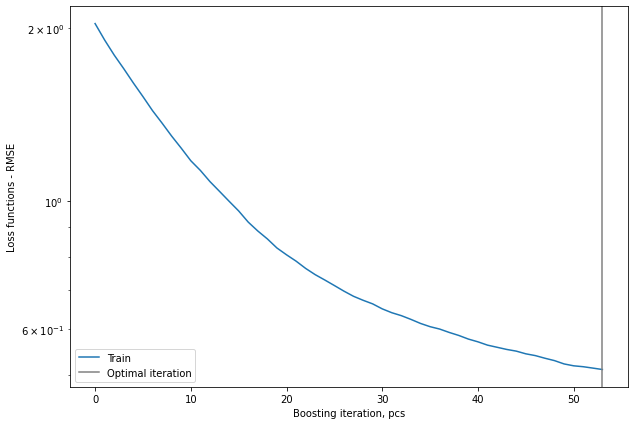

In [29]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.1
Relative bias(%):  -2.26
RMSE: 0.5
Relative RMSE(%):  0.207
MSE: 0.3
R square: 67.9%


In [32]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.107
a1: 0.529
R^2: 0.745
Uncertainty
a0: 1.11+/-0.08
a1: 0.529+/-0.031


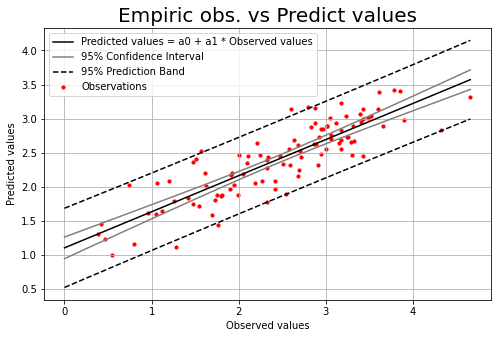

In [33]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

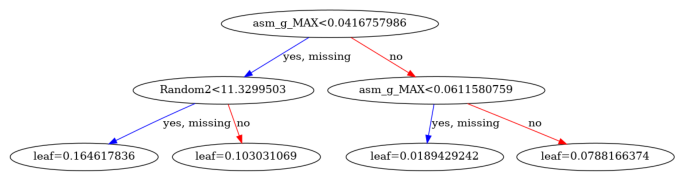

In [35]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

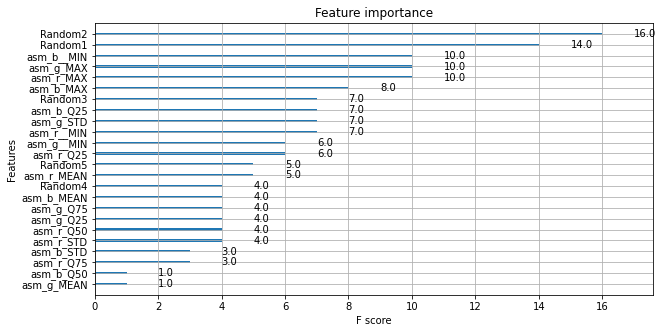

In [37]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

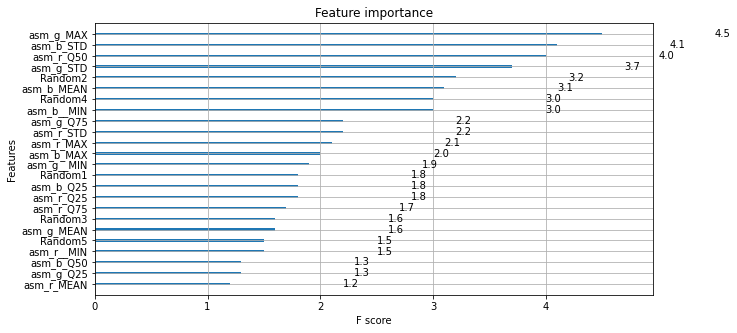

In [38]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

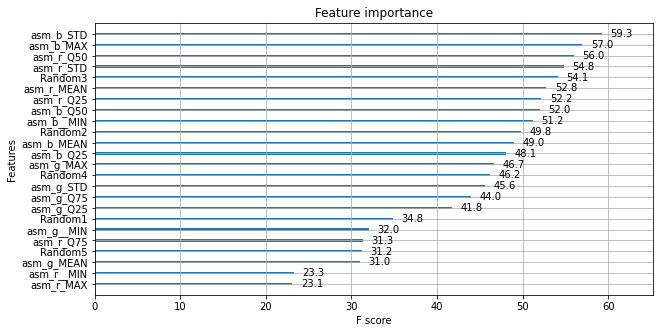

In [39]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [40]:
# Load SHAP`s library
import shap

In [41]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


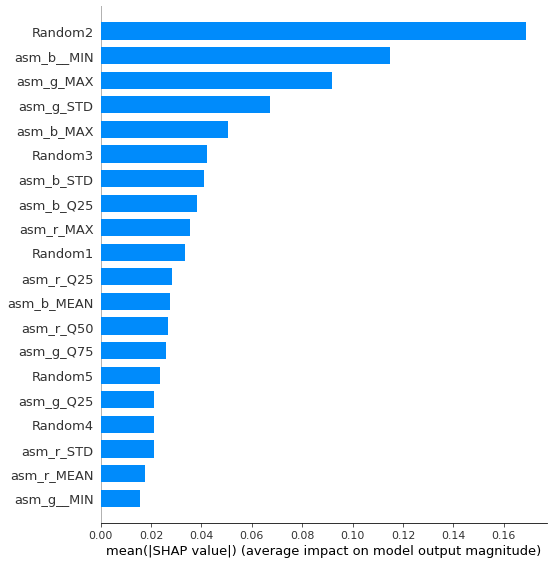

In [42]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

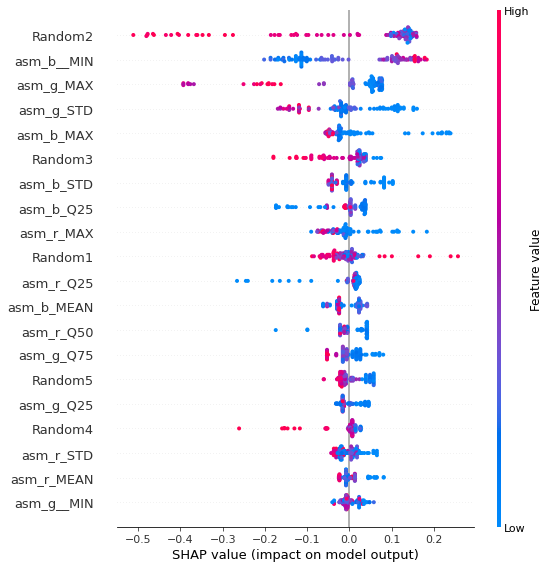

In [43]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

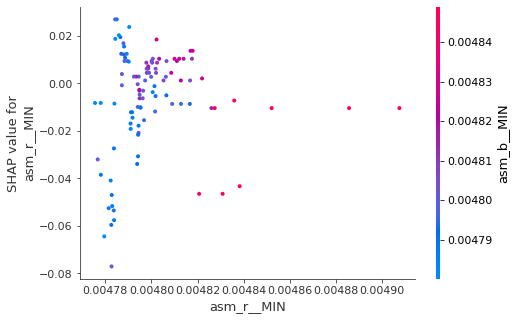

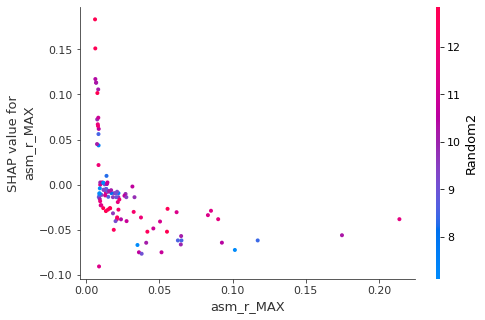

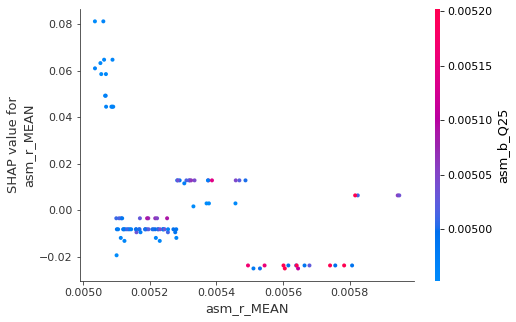

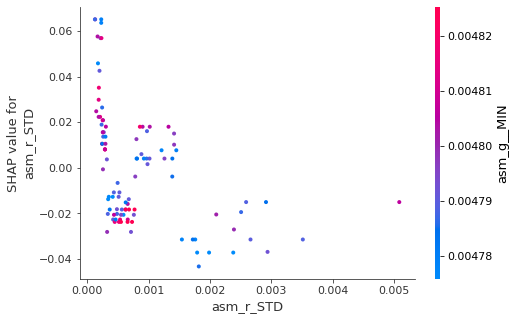

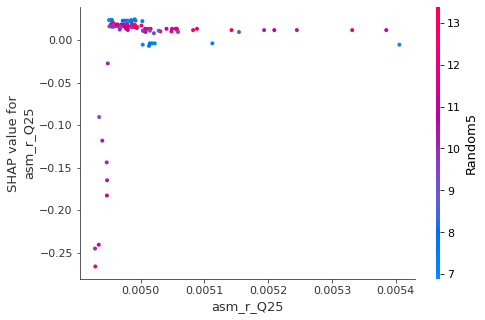

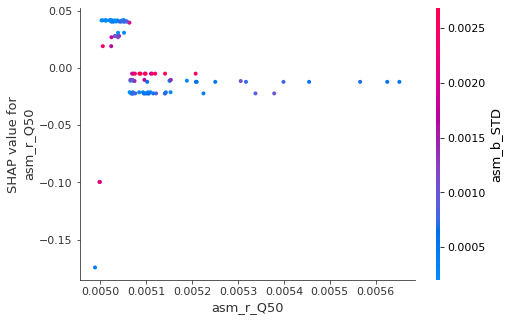

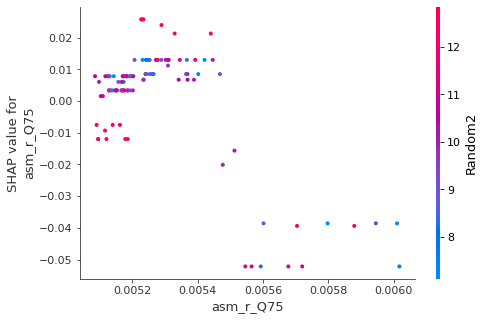

invalid value encountered in true_divide
invalid value encountered in true_divide


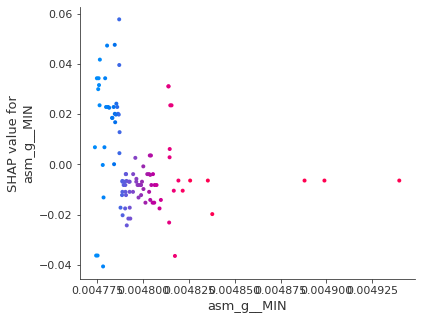

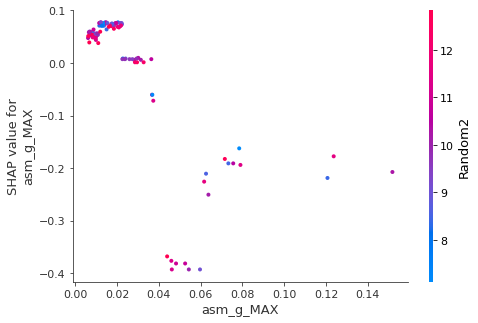

invalid value encountered in true_divide
invalid value encountered in true_divide


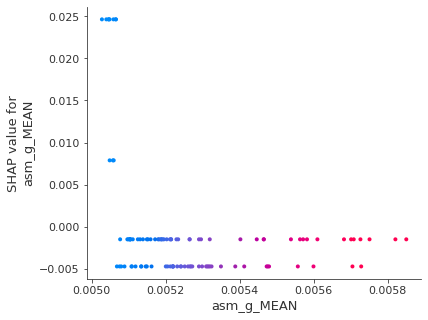

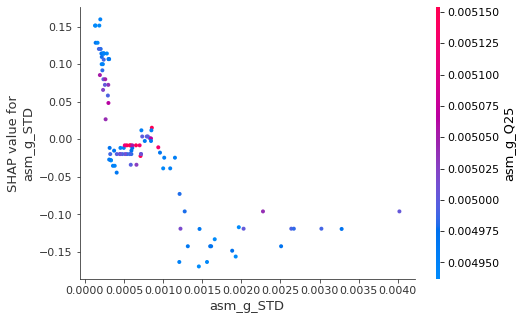

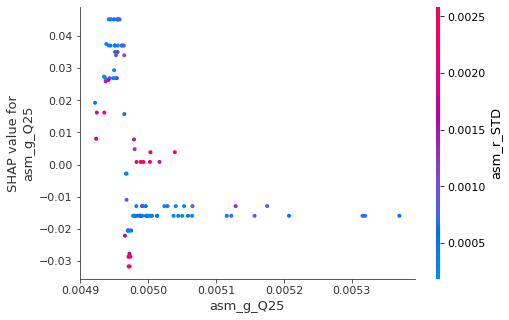

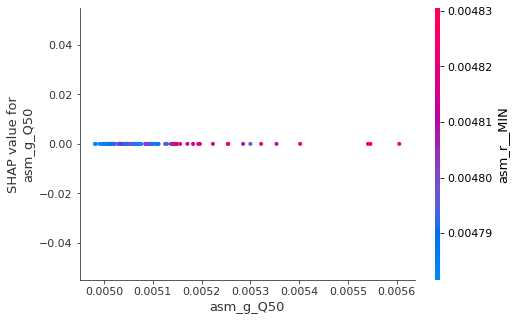

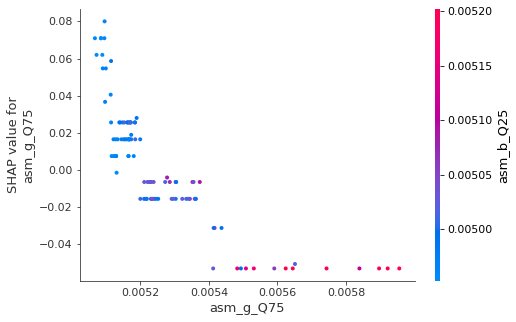

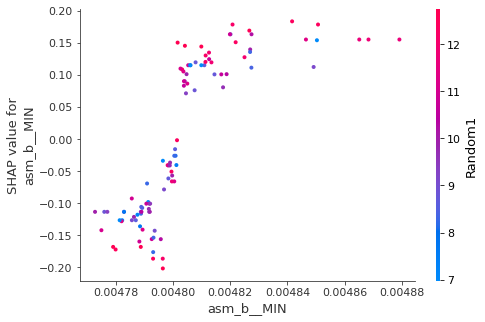

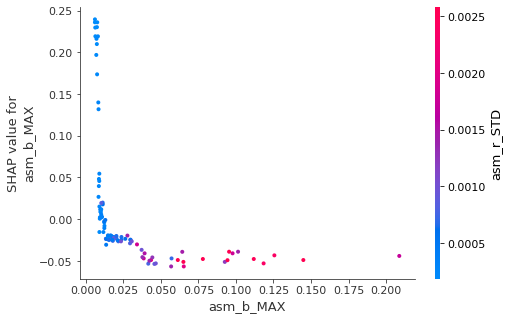

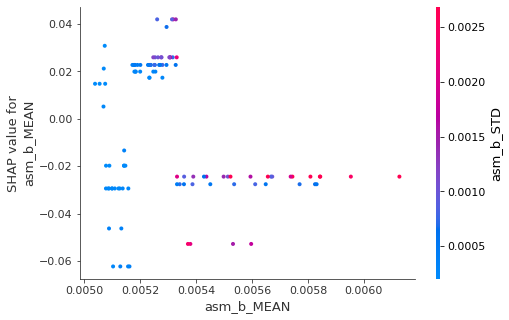

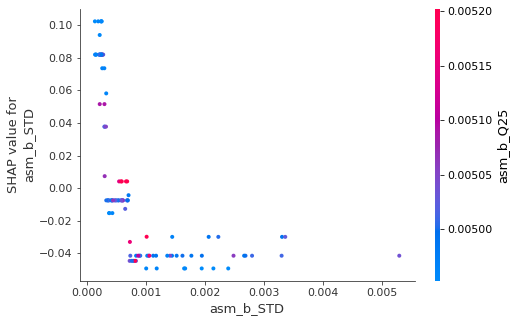

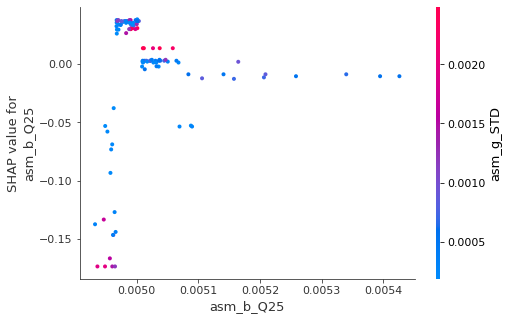

invalid value encountered in true_divide
invalid value encountered in true_divide


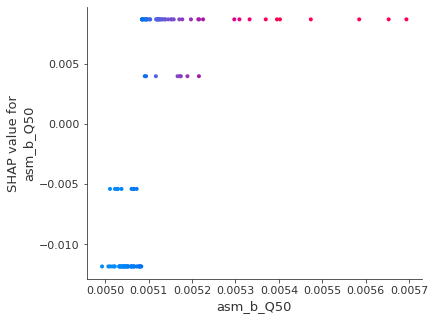

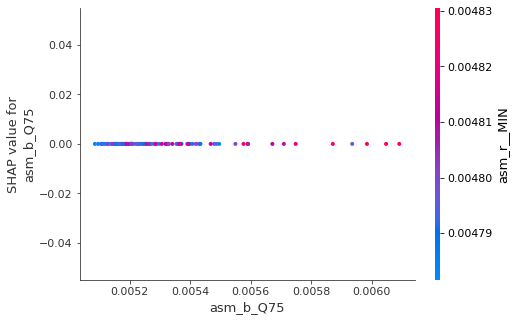

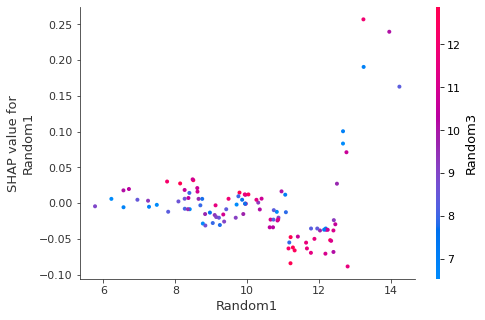

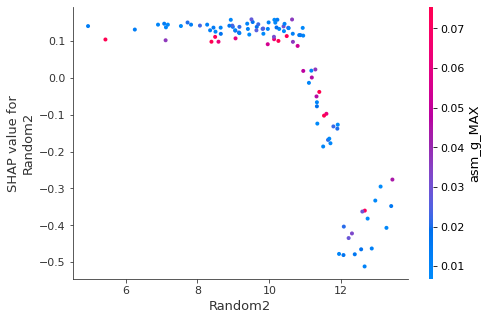

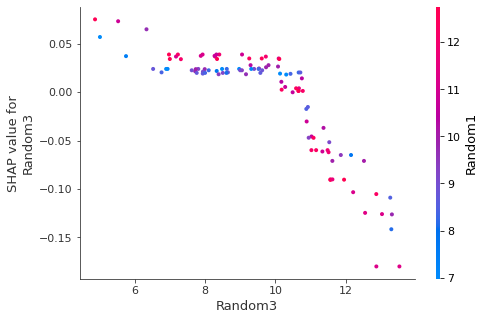

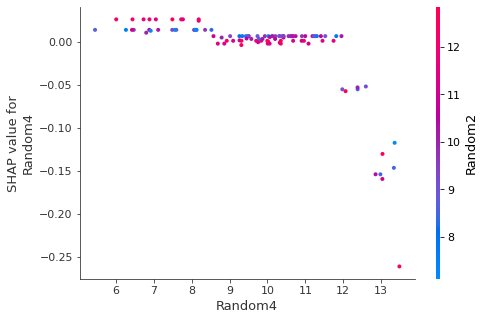

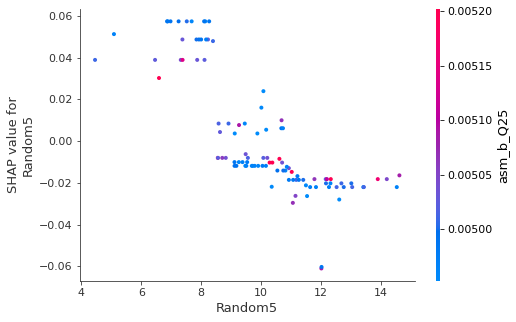

In [44]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_Sr_XGB_model_.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_St_XGB_model_.txt")